• **Lungs Disease Detector** (Python, CNN, Flask, Autoencoders) 
Constructed an advanced Machine Learning model using Convolutional Neural Networks (CNN) for the classification of lung diseases into categories such as pneumonia, tuberculosis (TB), COVID-19, and healthy individuals
through the analysis of X-ray scans.Achieved an impressive 90% accuracy

**1. Importing Required Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


This cell imports necessary libraries for building and training the CNN model, including TensorFlow and Keras for deep learning, and NumPy for numerical operations.

**2. Mount Google Drive and Set Paths for Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path='/content/drive/MyDrive/dataset/train'
valid_path='/content/drive/MyDrive/dataset/validation'
test_path='/content/drive/MyDrive/dataset/test'

Here, Google Drive is mounted to access the datasets, and paths are set for training, validation, and testing directories.

**3. Data Generators for Training, Validation, and Testing**

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(512,512),classes=['normal','pnemo','tb'],batch_size=50)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(512,512),classes=['normal','pnemo','tb'],batch_size=50)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(512,512),classes=['normal','pnemo','tb'],batch_size=50,shuffle=False)

Found 584 images belonging to 3 classes.
Found 594 images belonging to 3 classes.
Found 911 images belonging to 3 classes.


In [ ]:
imgs,labels=next(train_batches)

This cell sets up the ImageDataGenerator to preprocess images according to VGG16 requirements and loads the data from directories. The first batch of images is also fetched for visualization.

**4. Plotting Sample Images from the Dataset**

In [ ]:
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

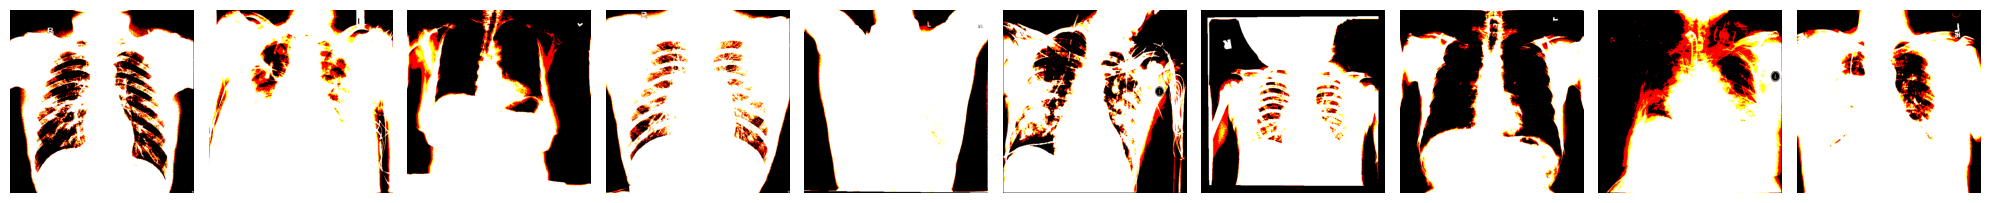

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)

This section defines and uses a function to display sample images from the dataset along with their corresponding labels.

**5. Building the Convolutional Neural Network (CNN)**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model=Sequential([
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(512,512,3)), #param=(3*3*3+1)*32
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),  #param=(3*3*32+1)*64
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Flatten(),
                  Dense(units=3,activation='softmax'), #param=size of flatten*2+2
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 3)                 3

This cell builds a CNN using Keras's Sequential API with convolutional and pooling layers, followed by a fully connected layer for classification.

**6. Compiling and Training the Model**

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=15,verbose=1)

Epoch 1/15
 8/12 [===================>..........] - ETA: 1:46 - loss: 5904.0288 - accuracy: 0.3646

Here, the model is compiled and trained using the training and validation datasets for 15 epochs.

**7. Making Predictions on the Test Set**

In [ ]:
predictions=model.predict(x=test_batches,verbose=0)

This code generates predictions for the test dataset using the trained model.

**8. Confusion Matrix to Evaluate Model Performance**

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [ ]:

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix,without Normalization')
    print(cm)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")



    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels=['normal','pnemo','tb']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

This section evaluates the model performance by plotting a confusion matrix, which shows the accuracy of predictions for each class.

**9. Saving the Trained Model**

In [ ]:
# Assuming 'model' is your TensorFlow or Keras model object
model.save('/content/drive/MyDrive/my_model.h5')


In [ ]:
model.save('my_model.keras')

The trained model is saved in both HDF5 and Keras formats for future use.

**10. Making Predictions on New Images**

In [ ]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
from keras.models import load_model

# Load the trained model
#model = load_model('my_model.h5')

# Function to preprocess input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(512, 512))  # Assuming input shape is (512, 512)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Upload an image to Colab
uploaded = files.upload()

# Get the uploaded image path
img_path = list(uploaded.keys())[0]

# Preprocess the input image
input_img = preprocess_image(img_path)

# Perform inference to predict the class
predictions = model.predict(input_img)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the class index to the corresponding class label
class_labels = ["normal", "pnemo", "tb"]  # Replace with your class labels
predicted_class_label = class_labels[predicted_class_index]

# Display the predicted class
print("Predicted class:", predicted_class_label)


This cell provides functionality to upload a new image, preprocess it, and use the trained model to predict its class, showcasing the inference process on new data.